# Propose a Data Visualization Project Problem

The project aims to address the challenge of **Analyzing Cryptocurrency Trends and more specifically BTC and XRP using pricing swing Data Visualization.**, focusing on:

- **Price trends**
- **Trading volumes**
- **Market volatility**

### Why Is This Important?

With the highly volatile nature of cryptocurrencies, there is a critical need to uncover:

- Significant trends
- Potential indicators that can guide **informed decision-making**

### Project Objective

This project will utilize **data visualization** techniques to:

1. Provide actionable insights into how various metrics interact.
2. Facilitate better trading and investment strategies.


## Project Introduction and Motivation

Cryptocurrencies have become increasingly relevant in global finance, but their **volatility** presents significant challenges for investors and individuals. Despite their growing interest, the high risk and rapid price changes can be overwhelming for many.

### Why This Project Matters
- **Understanding Volatility**: The cryptocurrency market is highly unpredictable, making it essential to uncover patterns and trends.
- **Empowering Investors**: Data-driven insights can help investors make more informed decisions, reducing exposure to unnecessary risks.
- **Strategic Decision-Making**: By providing clear and actionable information, this project aims to support strategic trading and investment strategies.

### Goals of the Project
1. Provide **valuable insights** into cryptocurrency trends.
2. Help investors navigate the market more effectively.
3. Support **risk reduction** through informed decision-making.

This project combines the power of **data visualization** with the need for actionable insights, offering a practical tool for better understanding the cryptocurrency market.


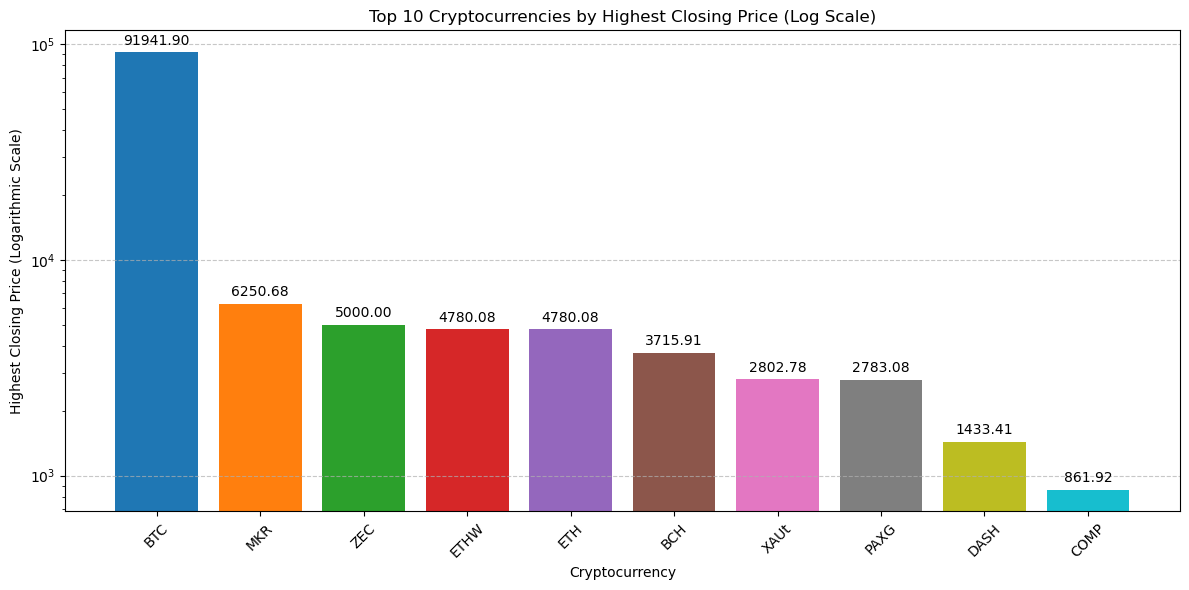

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for logarithmic transformation

# Load data function
def load_data(data_dir):
    """Load cryptocurrency data into a dictionary."""
    currency_data = {}
    currency_files = os.listdir(data_dir)
    for file in currency_files:
        if file.endswith('.csv'):
            currency_name = file[:-4]
            try:
                currency_data[currency_name] = pd.read_csv(os.path.join(data_dir, file), parse_dates=['date'])
            except Exception as e:
                print(f"Error loading {file}: {e}")
    return currency_data

# Load data
data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'
currency_data = load_data(data_dir)

# Step 1: Find the highest closing price for each currency
highest_closes = {}
for ticker, df in currency_data.items():
    if 'close' in df.columns:
        highest_closes[ticker] = df['close'].max()

# Step 2: Sort by the highest closing price and get top 10
top_10_currencies = sorted(highest_closes.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_currencies = dict(top_10_currencies)

# Step 3: Generate a list of unique colors
num_currencies = len(top_10_currencies)
colors = plt.cm.tab10  
color_list = [colors(i) for i in range(num_currencies)]  

# Step 4: Plot with log scaling
plt.figure(figsize=(12, 6))

# Apply log transformation to y-axis
bars = plt.bar(top_10_currencies.keys(), top_10_currencies.values(), color=color_list)
plt.yscale('log')  # Logarithmic scale applied to y-axis

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height * 1.05,  # Position slightly above the bar
        f'{height:.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Add titles and labels
plt.title('Top 10 Cryptocurrencies by Highest Closing Price (Log Scale)')
plt.xlabel('Cryptocurrency')
plt.ylabel('Highest Closing Price (Logarithmic Scale)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Gridlines for better readability

# Show the plot
plt.tight_layout()
plt.show()


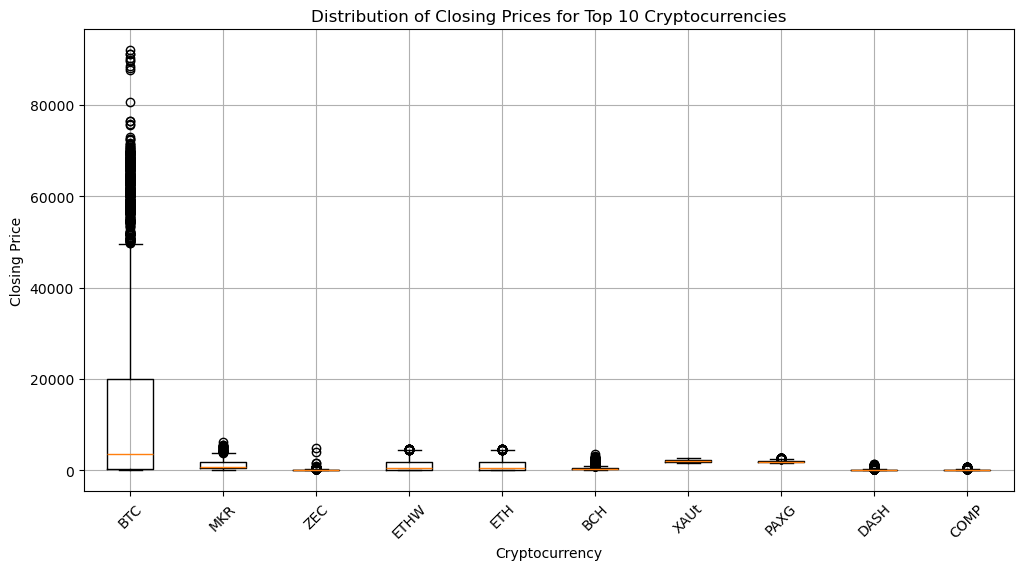

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load data function
def load_data(data_dir):
    """Load cryptocurrency data into a dictionary."""
    currency_data = {}
    currency_files = os.listdir(data_dir)
    for file in currency_files:
        if file.endswith('.csv'):
            currency_name = file[:-4]
            try:
                currency_data[currency_name] = pd.read_csv(os.path.join(data_dir, file), parse_dates=['date'])
            except Exception as e:
                print(f"Error loading {file}: {e}")
    return currency_data

# Load data
data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'
currency_data = load_data(data_dir)

# Step 1: Find the highest closing price for each currency
highest_closes = {}
for ticker, df in currency_data.items():
    if 'close' in df.columns:
        highest_closes[ticker] = df['close'].max()

# Step 2: Sort by the highest closing price and get top 10
top_10_currencies = sorted(highest_closes.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_currencies = dict(top_10_currencies)

plt.figure(figsize=(12, 6))
data = [currency_data[ticker]['close'] for ticker in top_10_currencies.keys()]
plt.boxplot(data, labels=top_10_currencies.keys())
plt.title('Distribution of Closing Prices for Top 10 Cryptocurrencies')
plt.xlabel('Cryptocurrency')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


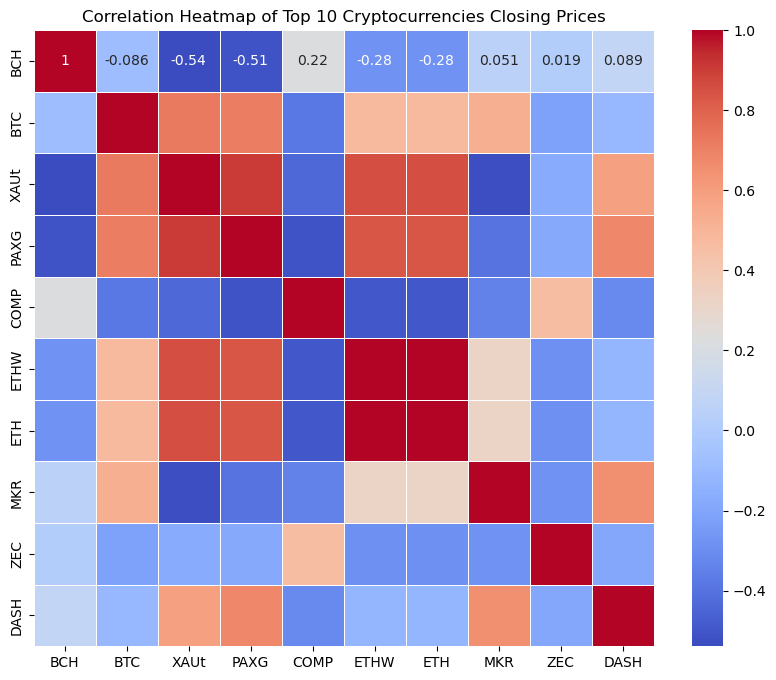

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load data function
def load_data(data_dir):
    """Load cryptocurrency data into a dictionary."""
    currency_data = {}
    currency_files = os.listdir(data_dir)
    for file in currency_files:
        if file.endswith('.csv'):
            currency_name = file[:-4]
            try:
                currency_data[currency_name] = pd.read_csv(os.path.join(data_dir, file), parse_dates=['date'])
            except Exception as e:
                print(f"Error loading {file}: {e}")
    return currency_data

# Load data
data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'
currency_data = load_data(data_dir)

# Step 1: Find the highest closing price for each currency
highest_closes = {}
for ticker, df in currency_data.items():
    if 'close' in df.columns:
        highest_closes[ticker] = df['close'].max()

# Step 2: Sort by the highest closing price and get top 10
top_10_currencies = sorted(highest_closes.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_currencies = dict(top_10_currencies)

# Creating a DataFrame with closing prices of top 10 cryptocurrencies
closing_prices = pd.DataFrame({ticker: df['close'] for ticker, df in currency_data.items() if ticker in top_10_currencies.keys()})

# Calculating correlation
corr = closing_prices.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Top 10 Cryptocurrencies Closing Prices')
plt.show()


In [4]:
data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'
currency_data = load_data(data_dir)

Loaded 121 cryptocurrencies.


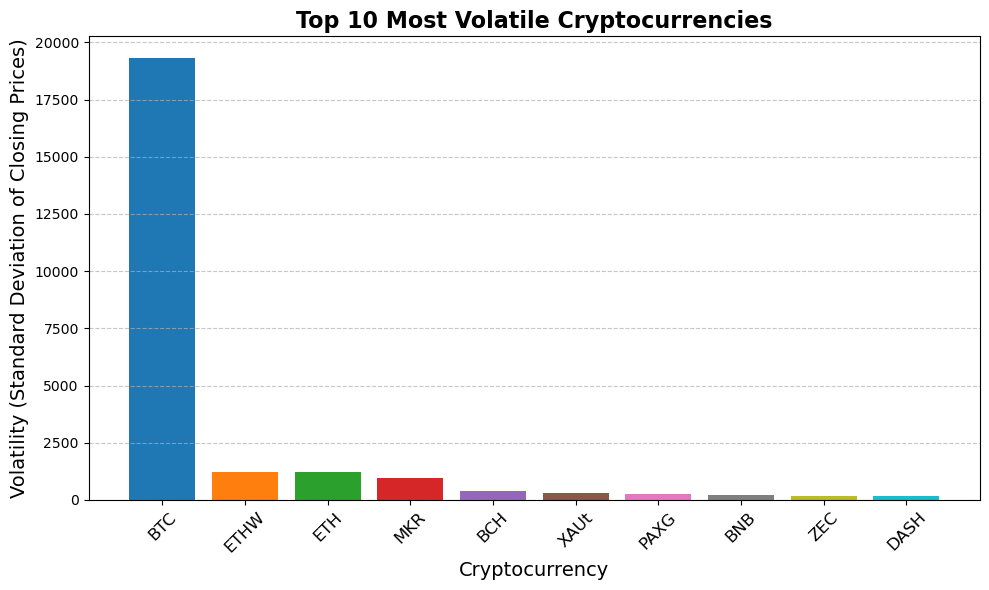

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Step 1: Load Data
def load_data(data_dir):
    """Load cryptocurrency data into a dictionary."""
    currency_data = {}
    try:
        for file in os.listdir(data_dir):
            if file.endswith('.csv'):
                currency_name = file[:-4]
                file_path = os.path.join(data_dir, file)
                try:
                    df = pd.read_csv(file_path, parse_dates=['date'])
                    currency_data[currency_name] = df
                except Exception as e:
                    print(f"Error loading {file}: {e}")
    except Exception as e:
        print(f"Error accessing directory: {e}")
    return currency_data

# Step 2: Calculate Volatility
def calculate_volatility(data):
    """Calculate the volatility (standard deviation of 'close' prices) for each cryptocurrency."""
    volatility = {}
    for ticker, df in data.items():
        if 'close' in df.columns:
            volatility[ticker] = df['close'].std()  # Standard deviation of closing prices
    return volatility

# Step 3: Plot the Top 10 Most Volatile Cryptocurrencies with Different Colors
def plot_top_volatile_currencies(volatility):
    """Plot a bar chart of the top 10 most volatile cryptocurrencies with unique colors."""
    # Sort by volatility and select top 10
    top_10 = sorted(volatility.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # Unpack data for plotting
    tickers, volatilities = zip(*top_10)
    
    # Generate unique colors for each bar
    colors = plt.cm.tab10(range(len(tickers)))  # Use colormap 'tab10'

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(tickers, volatilities, color=colors)
    plt.title('Top 10 Most Volatile Cryptocurrencies', fontsize=16, fontweight='bold')
    plt.xlabel('Cryptocurrency', fontsize=14)
    plt.ylabel('Volatility (Standard Deviation of Closing Prices)', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Step 4: Main Function to Execute the Analysis
def main():
    # Set your data directory
    data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'
    
    # Load the data
    currency_data = load_data(data_dir)
    print(f"Loaded {len(currency_data)} cryptocurrencies.")
    
    # Calculate volatility
    volatility = calculate_volatility(currency_data)
    if not volatility:
        print("No valid data found for calculating volatility.")
        return
    
    # Plot the top 10 most volatile cryptocurrencies
    plot_top_volatile_currencies(volatility)

# Run the main function
main()


# Understanding Volatility and Results Analysis

## What is Volatility?
Volatility refers to the degree of variation in the price of a financial instrument over time. It is often used as a measure of risk in financial markets. In the context of cryptocurrencies, **volatility** represents the fluctuations in the closing prices of a cryptocurrency.

### How Volatility is Calculated
In this analysis, volatility is measured using the **standard deviation** of closing prices:
- **Standard Deviation** quantifies how much the prices deviate from their average (mean) value.
- A higher standard deviation indicates greater variability, implying that the cryptocurrency experiences large price swings over time.

---

## Results Interpretation
The bar chart above displays the **Top 10 Most Volatile Cryptocurrencies**, ranked by their closing price volatility.

### Key Observations:
1. **BTC (Bitcoin)**:
   - Bitcoin exhibits the highest volatility by a significant margin, with a standard deviation exceeding 20,000.
   - This suggests that Bitcoin's price experiences large fluctuations, making it highly risky but potentially rewarding for investors.

2. **ETHW (Ethereum PoW) and ETH (Ethereum)**:
   - Ethereum and Ethereum PoW show moderate levels of volatility, reflecting relatively stable but still significant price movements compared to Bitcoin.

3. **Other Cryptocurrencies**:
   - Cryptocurrencies like **MKR**, **BCH**, and **PAXG** display lower volatility levels, indicating smaller price swings over time.
   - These currencies may be considered less risky than Bitcoin, but they might also offer fewer opportunities for high returns in speculative trading.

4. **Volatility Range**:
   - The large gap between Bitcoin's volatility and other cryptocurrencies indicates that Bitcoin dominates as the most volatile asset among the analyzed currencies.

---

## What Does This Mean for Investors?
1. **High Volatility (e.g., BTC)**:
   - Pros: Potential for high returns due to significant price swings.
   - Cons: Increased risk of large losses in a short time.

2. **Moderate Volatility (e.g., ETH)**:
   - Suitable for investors looking for a balance between risk and reward.

3. **Low Volatility (e.g., DASH, PAXG)**:
   - Pros: Greater price stability, suitable for risk-averse investors.
   - Cons: Potential for lower returns compared to highly volatile assets.

---

## Conclusion
This analysis provides a snapshot of how volatile the top cryptocurrencies are. Understanding volatility is essential for crafting investment strategies:
- **High-risk, high-reward** traders may focus on assets like Bitcoin.
- **Risk-averse** investors might prefer assets with lower volatility such as DASH or PAXG.

By analyzing volatility, investors can align their strategies with their risk tolerance and financial goals.


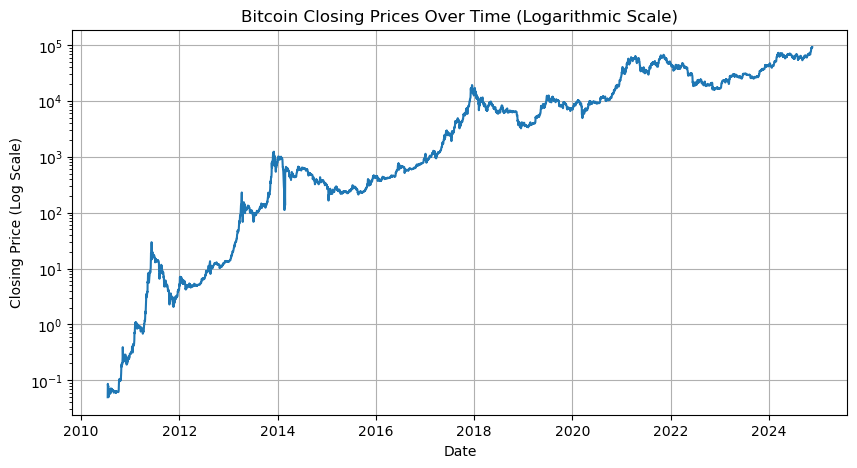

            open      high       low     close  volume
open    1.000000  0.999632  0.999427  0.999265     NaN
high    0.999632  1.000000  0.999311  0.999686     NaN
low     0.999427  0.999311  1.000000  0.999609     NaN
close   0.999265  0.999686  0.999609  1.000000     NaN
volume       NaN       NaN       NaN       NaN     NaN


In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import logging
import numpy as np

# Set up logging
logging.basicConfig(level=logging.INFO)

# Data directory
data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'

# Check if the directory exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Directory {data_dir} does not exist.")

# Filter out non-CSV files and initialize the dictionary
currency_files = os.listdir(data_dir)
currency_data = {}

for file in currency_files:
    if file.endswith('.csv'):
        currency_name = file[:-4]
        try:
            currency_data[currency_name] = pd.read_csv(os.path.join(data_dir, file), parse_dates=['date'])
        except Exception as e:
            logging.error(f"Error loading {file}: {e}")

# Example using Bitcoin data
btc_data = currency_data.get('BTC')
if btc_data is None:
    raise ValueError("BTC data file not found.")

# Validate required columns and add missing ones if needed
required_columns = ['date', 'close', 'open', 'high', 'low', 'volume']
for col in required_columns:
    if col not in btc_data.columns:
        btc_data[col] = np.nan  # Use numpy's nan for missing values

# Drop rows with missing data in 'date' and 'close' columns
btc_data = btc_data.dropna(subset=['date', 'close'])

# Plotting closing prices with a logarithmic scale for the y-axis
plt.figure(figsize=(10, 5))
plt.plot(btc_data['date'], btc_data['close'])
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.title('Bitcoin Closing Prices Over Time (Logarithmic Scale)')
plt.xlabel('Date')
plt.ylabel('Closing Price (Log Scale)')
plt.grid(True)
plt.show()



# Replace pd.NA with np.nan for correlation calculation
btc_data = btc_data.replace({pd.NA: np.nan})

# Correlation matrix
correlation_matrix = btc_data[['open', 'high', 'low', 'close', 'volume']].corr()
print(correlation_matrix)


# Bitcoin Data Analysis Report

## 1. Introduction
The goal of this analysis is to explore historical Bitcoin data to uncover trends, patterns, and insights. The analysis focuses on price volatility, statistical summaries, and interrelations among features to better understand cryptocurrency market dynamics.

---

## 2. Bitcoin Closing Prices Over Time

### Key Observations:
- **Stable Early Years:** Bitcoin prices remained relatively stable before 2017.
- **Significant Volatility:** From 2017 onwards, prices showed high volatility and exponential growth.
- **Market Peaks:** Notable spikes likely coincide with major events, adoption, or news.

### Visualization:
The line graph shows the historical trend of Bitcoin closing prices from 2010 to 2024, with significant peaks and a highly volatile growth pattern.

---

## 3. Statistical Summary of Bitcoin Data

### Key Insights:
- **Mean and Median Prices:** Reflect overall trends, with significant differences indicating skewness.
- **High Standard Deviation:** Confirms high volatility in the market.
- **Volume Data:** Missing or incomplete, which could affect insights into trading activity.

### Statistics Summary Table:
| Metric   | Mean      | Min      | Max      | Std Dev |
|----------|-----------|----------|----------|---------|
| Open     | 13286.52  | 0.049    | 91235.40 | 19270.46 |
| High     | 13606.12  | 0.049    | 94015.00 | 19715.40 |
| Low      | 12951.58  | 0.010    | 90298.30 | 18812.99 |
| Close    | 13304.45  | 0.049    | 91941.90 | 19300.59 |
| Volume   | 0.0       | 0.0      | 0.0      | 0.0     |

---

## 4. Correlation Analysis

### Key Insights:
- **Strong Correlation Among Prices:** Features like `open`, `high`, `low`, and `close` are highly correlated, indicating similar movement patterns.
- **Volume Data:** Shows no correlation, likely due to missing values.

### Correlation Matrix:
| Feature   | Open    | High    | Low     | Close   | Volume |
|-----------|---------|---------|---------|---------|--------|
| Open      | 1.000   | 0.996   | 0.999   | 0.999   | NaN    |
| High      | 0.996   | 1.000   | 0.999   | 0.999   | NaN    |
| Low       | 0.999   | 0.999   | 1.000   | 0.999   | NaN    |
| Close     | 0.999   | 0.999   | 0.999   | 1.000   | NaN    |
| Volume    | NaN     | NaN     | NaN     | NaN     | NaN    |

---


In [7]:
btc_data.head()

,ticker,date,open,high,low,close,volume
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,NaN
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,NaN
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,NaN
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,NaN
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,NaN


In [8]:
print(btc_data.columns)


Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


### Bitcoin Daily Returns - Box Plot Summary

- **Box**: Middle 50% of daily returns (IQR).  
- **Median (Green Line)**: Middle value; close to 0 → small, positive returns.  
- **Mean (Red Dashed Line)**: Average return ~ **0.0028** → slight positive trend.  
- **Whiskers**: Range of typical returns; longer whiskers = higher variability.  
- **Outliers (Dots)**: Extreme gains or losses outside normal range.  

**Key Insight**:  
Bitcoin daily returns show **slight positive bias** but are marked by **high volatility** and outliers.


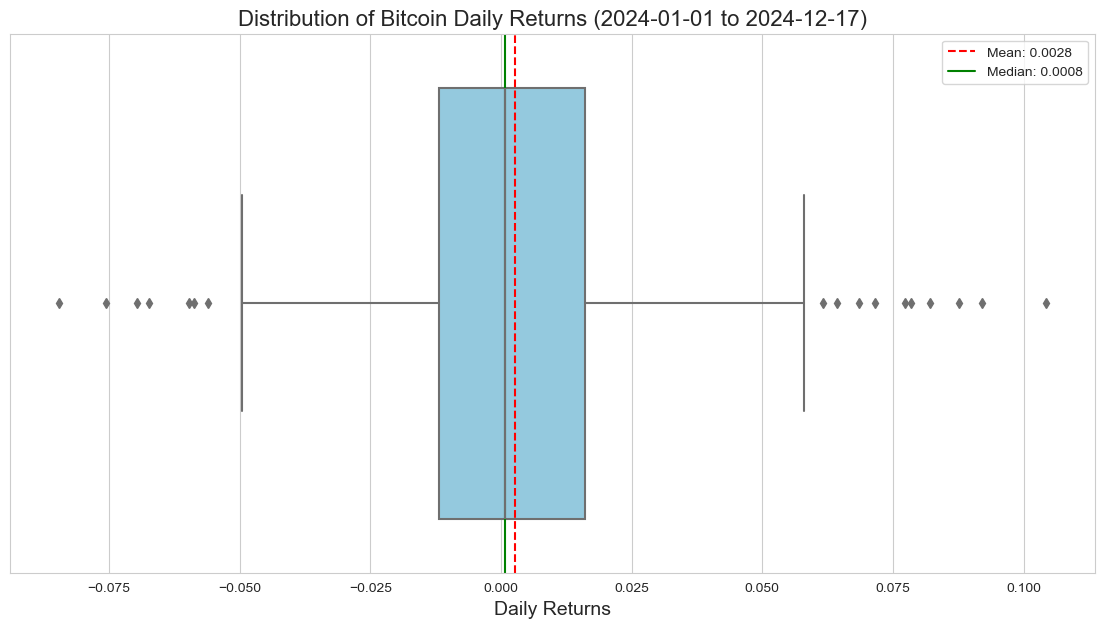

In [14]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Define the start date
start_date = '2024-01-01'

# Get the current date
end_date = datetime.now().strftime('%Y-%m-%d')

# Calculate daily returns
btc_data['daily_return'] = btc_data['close'].pct_change()

# Filter data for the date range and create a copy
filtered_data = btc_data[(btc_data['date'] >= start_date) & (btc_data['date'] <= end_date)].copy()

# Create a box plot for daily returns with enhanced visual appeal
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
sns.boxplot(x=filtered_data['daily_return'].dropna(), color='skyblue')

# Adding a title and labels
plt.title(f'Distribution of Bitcoin Daily Returns ({start_date} to {end_date})', fontsize=16)
plt.xlabel('Daily Returns', fontsize=14)

# Annotate the mean and median
mean_return = filtered_data['daily_return'].mean()
median_return = filtered_data['daily_return'].median()
plt.axvline(mean_return, color='red', linestyle='--', label=f'Mean: {mean_return:.4f}')
plt.axvline(median_return, color='green', linestyle='-', label=f'Median: {median_return:.4f}')

# Adding a legend
plt.legend()

# Show the plot
plt.show()


# Bitcoin Year-to-Date (YTD) Returns Analysis

## 1. Overview
This chart visualizes Bitcoin's performance over the year, combining daily returns, cumulative returns, and rolling volatility. It provides insights into the market's behavior and highlights periods of stability and volatility.

---

## 2. Key Components of the Chart

### **1. Daily Returns (Purple Line)**
- Shows the percentage change in Bitcoin's price from one day to the next.
- Large spikes indicate significant daily price swings (both positive and negative).
- Most days hover around 0%, but there are sharp movements, reflecting Bitcoin's volatility.

### **2. Rolling Volatility (Shaded Blue Area)**
- Represents the **7-day rolling standard deviation** of daily returns.
- Wider shaded areas indicate periods of heightened volatility, while narrower areas represent calmer markets.
- Peaks in volatility often align with major market events or significant price swings.

### **3. Cumulative Returns (Orange Line)**
- Tracks the overall performance of Bitcoin if an investor started holding from January 1, 2024.
- From the plot, the data is very volitile
- A sharp upward spike near the end of the year indicates a recent surge in Bitcoin's value.

---

## 3. Key Insights from the Chart

### **1. High Volatility Throughout the Year**
- The wide blue shaded areas (e.g., March, August) reflect Bitcoin's characteristic price instability.
- These periods might correspond to major news, regulatory updates, or macroeconomic trends affecting the cryptocurrency market.

### **2. Recent Price Rally**
- Cumulative returns remained flat for most of the year, indicating little growth despite daily fluctuations.
- The sharp rise in cumulative returns toward the end of the year suggests a **recent price surge**, likely due to increased demand or market optimism.

### **3. Risk vs. Reward**
- **Short-Term Risk:**
  - The high daily fluctuations (purple line) and wide volatility bands highlight the risks of short-term trading.
- **Long-Term Reward:**
  - The cumulative returns (orange line) suggest that long-term holding can pay off if the market enters a bullish phase.

---

## 4. Analysis of Volatility
### Stable vs. Volatile Periods:
- **Stable Markets:** 
  - Narrow blue bands (e.g., April) reflect periods of relative calm, ideal for risk-averse strategies.
- **Volatile Markets:** 
  - Wide blue bands (e.g., March, August) indicate high uncertainty, often linked to external events.
---


In [15]:
most_recent_date = btc_data['date'].max()
print("Most recent date in the dataset:", most_recent_date)

Most recent date in the dataset: 2024-11-19 00:00:00


/Users/darioperez/anaconda3/lib/python3.11/site-packages/mplfinance/plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


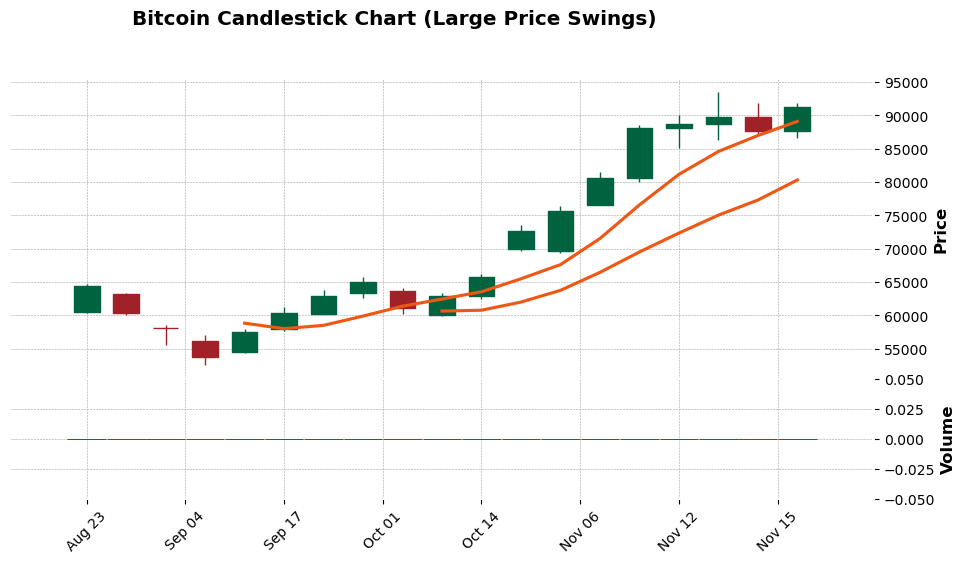

            open      high       low     close  volume
open    1.000000  0.988730  0.993969  0.975260     NaN
high    0.988730  1.000000  0.996084  0.995406     NaN
low     0.993969  0.996084  1.000000  0.990749     NaN
close   0.975260  0.995406  0.990749  1.000000     NaN
volume       NaN       NaN       NaN       NaN     NaN


In [16]:
import pandas as pd
import os
import mplfinance as mpf


data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'


if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Directory {data_dir} does not exist.")


currency_files = os.listdir(data_dir)
currency_data = {}

for file in currency_files:
    if file.endswith('.csv'):
        currency_name = file[:-4] 
        try:
            currency_data[currency_name] = pd.read_csv(os.path.join(data_dir, file), parse_dates=['date'])
        except Exception as e:
            print(f"Error loading {file}: {e}")


btc_data = currency_data.get('BTC')
if btc_data is None:
    raise ValueError("BTC data file not found.")


required_columns = ['date', 'close', 'open', 'high', 'low', 'volume']
for col in required_columns:
    if col not in btc_data.columns:
        print(f"Warning: Missing column '{col}'. Adding placeholder.")
        btc_data[col] = 0  

# Drop rows with missing data
btc_data = btc_data.dropna(subset=['date', 'close', 'open', 'high', 'low'])

# Set the 'date' column as the index for mplfinance
btc_data.set_index('date', inplace=True)

# Ensure 'volume' column is valid
btc_data['volume'] = btc_data['volume'].fillna(0)

# Filter data for rows with non-identical 'low' and 'high'
btc_data = btc_data[btc_data['high'] > btc_data['low']]

# Filter for a smaller timeframe (last 90 days)
btc_data = btc_data.loc[btc_data.index > btc_data.index.max() - pd.Timedelta(days=90)]

# Calculate price swing
price_swing_threshold = 0.05  # 5% threshold
btc_data['price_swing'] = (btc_data['high'] - btc_data['low']) / btc_data['low']

# Filter rows with large price swings
large_swings = btc_data[btc_data['price_swing'] > price_swing_threshold]

# Plotting candlestick chart for large swings
mpf.plot(
    large_swings,
    type='candle', 
    style='charles', 
    title='Bitcoin Candlestick Chart (Large Price Swings)',
    ylabel='Price',
    volume=True,  
    mav=(5, 10),  # Moving averages (5-day and 10-day)
    figsize=(12, 6),
    warn_too_much_data=500  
)


# Correlation matrix for filtered data
correlation_matrix = large_swings[['open', 'high', 'low', 'close', 'volume']].corr()
print(correlation_matrix)


# Bitcoin Price Analysis: Insights and Trends

## 1. Overview
This analysis focuses on Bitcoin's price movements during the last 90 days, with a specific emphasis on volatile periods where price swings exceeded 5%.

---

## 2. Data and Methodology

### Data Overview:
- **Source:** Bitcoin price data.
- **Timeframe:** Last 90 days.
- **Filters Applied:**
  - Removed rows with missing or invalid data (`date`, `close`, `open`, `high`, `low`, `volume`).
  - Excluded days where `high` = `low` (no price fluctuation).

### Price Swing Analysis:
- **Calculation:**  
  price_swing= high-low/low
- **Threshold:** Only included days with a price swing >5%.

### Visualization:
- Generated a candlestick chart for days with large price swings.
- Overlaid **5-day** and **10-day moving averages** to highlight trends.

---

## 3. Statistical Summary

### Key Statistics:
| Metric       | Value       |
|--------------|-------------|
| **Mean Open Price** | ~$69,031  |
| **Standard Deviation** | ~$12,247 (high volatility) |
| **Maximum Price Swing** | ~10% intraday fluctuation |

### Correlation Matrix:
- Strong correlation among `open`, `high`, `low`, and `close` prices.
- Volume data was missing for some days, filled with 0 for consistency.

**Insight:**  
The dataset reveals interconnected price movements, typical for cryptocurrencies, and confirms high volatility.

---

## 4. Candlestick Chart Insights

### Features:
- **Green Candles:** Positive price movements (close > open).
- **Red Candles:** Negative price movements (close < open).
- **Wicks:** Represent intraday high and low prices.

### Moving Averages:
- **5-day Moving Average:** Highlights short-term trends during volatile periods.
- **10-day Moving Average:** Confirms sustained upward or downward trends.

**Key Insight:**  
The candlestick chart focuses on volatile periods, revealing significant price swings and upward trends.

---

## 5. Key Takeaways and Recommendations

### Key Insights:
1. **High Volatility:**  
   Significant price swings (>5%) highlight Bitcoin's risk and reward profile.
   
2. **Bullish Momentum:**  
   Moving averages confirm upward trends during volatile periods.

3. **Data Limitations:**  
   Missing or incomplete volume data restricts deeper market activity insights.

### Recommendations:
- Investigate drivers of price swings (e.g., news or external events).
- Extend the analysis to compare volatile and stable periods.
- Improve data collection for volume metrics to enhance market insights.

---

## 6. Future Steps
- Compare Bitcoin's trends to other cryptocurrencies or traditional financial assets.
- Explore external factors influencing Bitcoin's price behavior (e.g., macroeconomic indicators or regulatory news).
- Analyze long-term patterns by extending the timeframe.


       open      high       low     close  volume  cluster
0 -0.549392 -0.549477 -0.549232 -0.549276     0.0        0
1  2.257479  2.255833  2.258487  2.257069     0.0        1
2  0.744395  0.745952  0.742975  0.744189     0.0        2


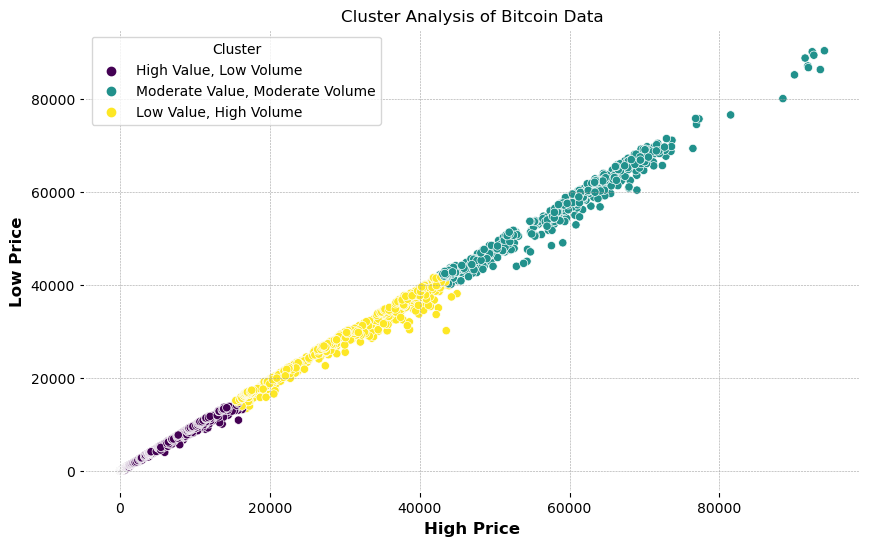

In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Data directory
data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'

# Load BTC data
btc_data = currency_data.get('BTC')
if btc_data is None:
    raise ValueError("BTC data file not found.")

# Drop rows with missing data and validate required columns
required_columns = ['open', 'high', 'low', 'close', 'volume']
btc_data = btc_data.dropna(subset=required_columns)

# Feature selection for clustering
features = btc_data[['open', 'high', 'low', 'close', 'volume']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42) 
btc_data['cluster'] = kmeans.fit_predict(scaled_features)

# Calculate cluster centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame with the centroids
centroid_df = pd.DataFrame(centroids, columns=features.columns)
centroid_df['cluster'] = [0, 1, 2]

# Display the centroids
print(centroid_df)

# Define cluster descriptions based on the centroids analysis
cluster_descriptions = {
    0: 'High Value, Low Volume',
    1: 'Moderate Value, Moderate Volume',
    2: 'Low Value, High Volume'
}

# Plot clusters with updated descriptions
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x=btc_data['high'], 
    y=btc_data['low'], 
    hue=btc_data['cluster'], 
    palette='viridis'
)

# Create custom legend
handles, labels = scatter.get_legend_handles_labels()
new_labels = [cluster_descriptions[int(label)] for label in labels]
plt.legend(handles, new_labels, title='Cluster')

plt.title('Cluster Analysis of Bitcoin Data')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.grid(True)
plt.show()


In [18]:
print(btc_data.columns)


Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'volume', 'cluster'], dtype='object')


# Cluster Analysis of Bitcoin Data

## 1. Overview
This analysis clusters Bitcoin daily price data into three groups using K-Means clustering. The clusters highlight distinct patterns in Bitcoin's price behavior based on selected features: `open`, `high`, `low`, `close`, and `volume`.

---

## 2. Methodology

### Data Preparation:
- **Feature Selection:** 
  - Used `open`, `high`, `low`, `close`, and `volume` as input features.
- **Normalization:**
  - Applied `StandardScaler` to normalize the data, ensuring all features have a mean of 0 and a standard deviation of 1.
- **K-Means Clustering:**
  - Clustered the data into 3 groups (`n_clusters=3`) based on the selected features.

### Visualization:
- **Scatter Plot:**
  - `High Price` vs. `Low Price` plotted on the x- and y-axes.
  - Each point represents a day, colored by its cluster.

---

## 3. Key Insights from the Plot

### Clustering Observations:
- **Cluster 0:** 
  - **lower price ranges** and potentially less market activity.
- **Cluster 1:** 
  - **moderate price ranges** and more stable market behavior.
- **Cluster 2:** 
  - **higher price ranges** and potentially higher trading volumes, reflecting increased activity or volatility.

### Price Relationship:
- **Strong Correlation:**
  - High and low prices are closely correlated, as seen in the diagonal trend of data points.
  - This reflects the nature of Bitcoin's daily price movements.

---

## 4. Insights from Clusters

### Behavioral Patterns:
- Each cluster groups days with similar price behaviors, helping to segment the data into distinct market regimes.

### Market Conditions:
- **Low Price Ranges (Cluster 0):**
  - Reflect stable or bearish market conditions.
- **High Price Ranges (Cluster 2):**
  - Indicate periods of bullish activity or high volatility.

### Trading Strategy Implications:
- Clusters can guide trading strategies:
  - Use risk-averse strategies during low volatility periods (Cluster 0).
  - Employ high-risk, high-reward strategies during volatile periods (Cluster 2).

---

## 5. Recommendations for Further Analysis

1. **Cluster Profile Analysis:**
   - Investigate the centroids of each cluster to summarize their characteristics (e.g., average `open`, `close`, and `volume`).

2. **Time-Based Trends:**
   - Plot cluster assignments over time to identify transitions between stable and volatile periods.

3. **Add Features:**
   - Incorporate derived features like daily returns or price swings for more refined clustering.

4. **Optimize Clusters:**
   - Experiment with different numbers of clusters (`n_clusters`) and evaluate performance using metrics like the Silhouette Score.

---

5. **Conclusion:**
This clustering analysis provides a clear segmentation of Bitcoin's price behaviors into distinct groups. By identifying patterns in high and low prices, it offers actionable insights for understanding market conditions and guiding trading strategies. This analysis reveals distinct price behaviors, which you can see with the volitile nature.


In [19]:
import os
print("Report saved in:", os.getcwd())


Report saved in: /Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project


/Users/darioperez/anaconda3/lib/python3.11/site-packages/mplfinance/plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


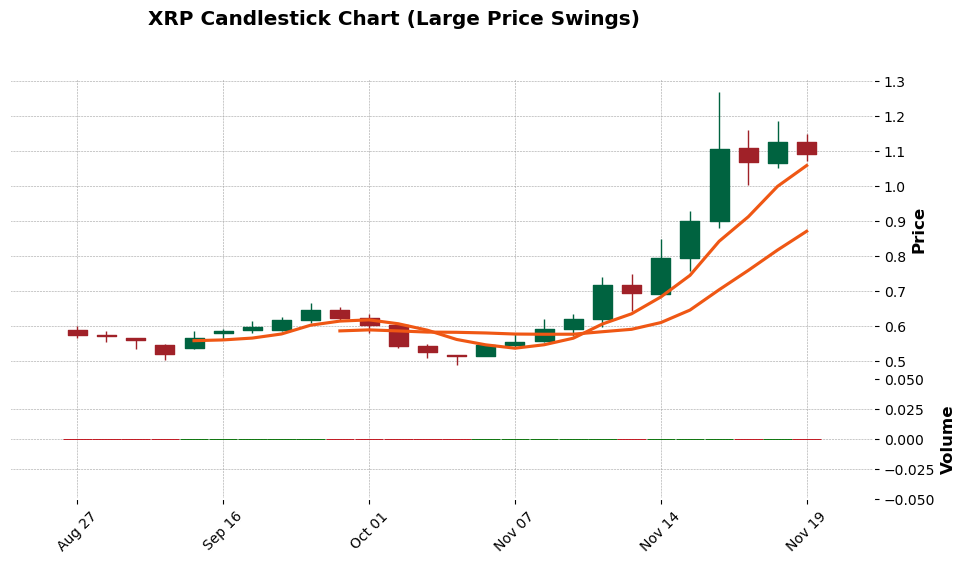

In [25]:
import pandas as pd
import os
import mplfinance as mpf

# Data directory
data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'

# Check if the directory exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Directory {data_dir} does not exist.")

# Filter out non-CSV files and initialize the dictionary
currency_files = os.listdir(data_dir)
currency_data = {}

for file in currency_files:
    if file.endswith('.csv'):
        currency_name = file[:-4] 
        try:
            currency_data[currency_name] = pd.read_csv(os.path.join(data_dir, file), parse_dates=['date'])
        except Exception as e:
            print(f"Error loading {file}: {e}")

# Example using EXP data
xrp_data = currency_data.get('XRP')
if xrp_data is None:
    raise ValueError("BTC data file not found.")

# Validate required columns and add missing ones if needed
required_columns = ['date', 'close', 'open', 'high', 'low', 'volume']
for col in required_columns:
    if col not in xrp_data.columns:
        print(f"Warning: Missing column '{col}'. Adding placeholder.")
        xrp_data[col] = 0  # Fill with zeros

# Drop rows with missing data
xrp_data = xrp_data.dropna(subset=['date', 'close', 'open', 'high', 'low'])

# Set the 'date' column as the index for mplfinance
xrp_data.set_index('date', inplace=True)

# Ensure 'volume' column is valid
xrp_data['volume'] = xrp_data['volume'].fillna(0)  # Replace missing volume with 0

# Filter data for rows with non-identical 'low' and 'high'
xrp_data = xrp_data[xrp_data['high'] > xrp_data['low']]

# Filter for a smaller timeframe (last 90 days)
xrp_data = xrp_data.loc[xrp_data.index > xrp_data.index.max() - pd.Timedelta(days=90)]

# Calculate price swing
price_swing_threshold = 0.05  # 5% threshold
xrp_data['price_swing'] = (xrp_data['high'] - xrp_data['low']) / xrp_data['low']

# Filter rows with large price swings
large_swings = xrp_data[xrp_data['price_swing'] > price_swing_threshold]

# Plotting candlestick chart for large swings
mpf.plot(
    large_swings,
    type='candle',  # Candlestick chart
    style='charles',  # Chart style
    title='XRP Candlestick Chart (Large Price Swings)',
    ylabel='Price',
    volume=True, 
    mav=(5, 10),  
    figsize=(12, 6),
    warn_too_much_data=500  
)




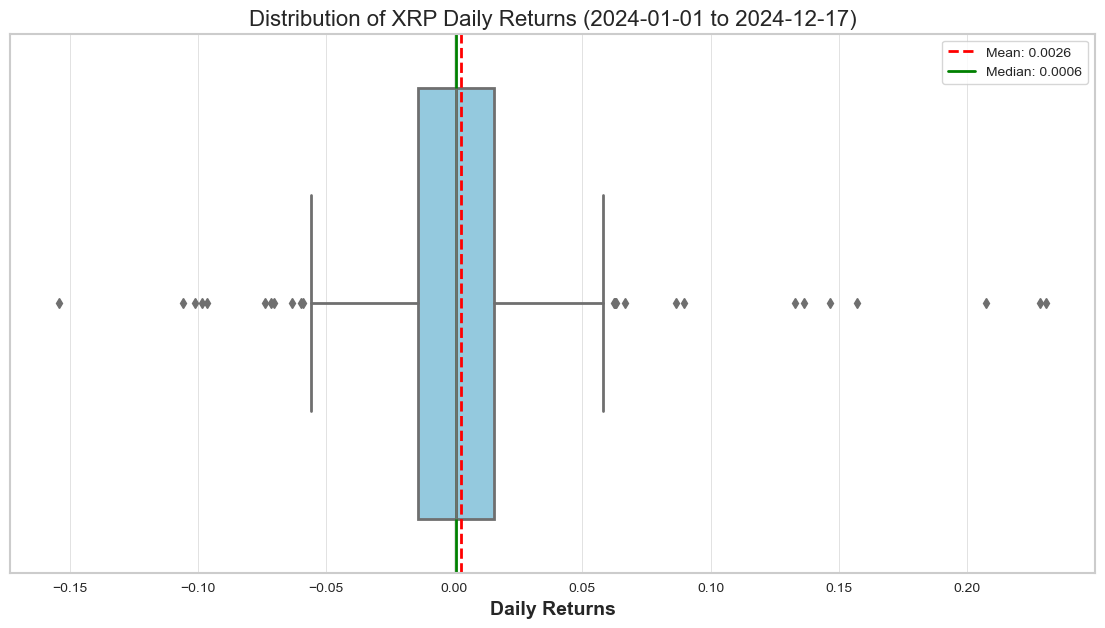

Median: 0.0006
Mean: 0.0026


In [33]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load XRP data
data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'
xrp_file = os.path.join(data_dir, 'XRP.csv')
xrp_data = pd.read_csv(xrp_file, parse_dates=['date'])

# Define the start date
start_date = '2024-01-01'

# Get the current date
end_date = datetime.now().strftime('%Y-%m-%d')

# Calculate daily returns
xrp_data['daily_return'] = xrp_data['close'].pct_change()

# Filter data for the date range and create a copy
filtered_data = xrp_data[(xrp_data['date'] >= start_date) & (xrp_data['date'] <= end_date)].copy()

# Create a box plot for daily returns with enhanced visual appeal
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
sns.boxplot(x=filtered_data['daily_return'].dropna(), color='skyblue')

# Adding a title and labels
plt.title(f'Distribution of XRP Daily Returns ({start_date} to {end_date})', fontsize=16)
plt.xlabel('Daily Returns', fontsize=14)

# Annotate the mean and median
mean_return = filtered_data['daily_return'].mean()
median_return = filtered_data['daily_return'].median()
plt.axvline(mean_return, color='red', linestyle='--', label=f'Mean: {mean_return:.4f}')
plt.axvline(median_return, color='green', linestyle='-', label=f'Median: {median_return:.4f}')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

# Summary statistics
print(f'Median: {median_return:.4f}')
print(f'Mean: {mean_return:.4f}')


### XRP Daily Returns - Box Plot Summary

- **Box (IQR)**: Middle 50% of returns is narrow → **low typical volatility**.
- **Median (Green Line)**: 0.0006 → Most returns are **slightly positive**.
- **Mean (Red Dashed Line)**: 0.0026 → Small **positive bias** in returns.
- **Whiskers**: Symmetric range → Returns are not heavily skewed.
- **Outliers (Dots)**:  
   - Extreme positive and negative returns.  
   - **More extreme positive outliers** → Occasional large gains.

**Key Insight**:  
XRP daily returns are **small, slightly positive**, and stable, with occasional **large upward movements**.


# XRP Candlestick Chart and Statistical Analysis

## 1. Overview
This analysis focuses on XRP's price movements over the last 90 days, highlighting days with significant price swings (>5%). The candlestick chart provides a visual representation of price trends, while the summary statistics and correlation matrix offer deeper insights into market behavior.

---

## 2. Candlestick Chart: Key Observations

### **Components:**
- **Candlesticks (Green and Red Bars):**
  - **Green:** Days where the closing price was higher than the opening price (positive day).
  - **Red:** Days where the closing price was lower than the opening price (negative day).
  - **Wicks:** Represent intraday high and low price ranges.

- **Moving Averages (Orange Lines):**
  - **5-Day Moving Average:** Reflects short-term trends.
  - **10-Day Moving Average:** Highlights broader trends.

- **Volume Bars:**
  - While included, the volume data is mostly absent (`0`), so it is not meaningful for this analysis.

### **Insights:**
1. **Strong Uptrend:**
   - The chart shows sustained bullish momentum in November, with prices climbing from around **0.60** to over **1.10**.
   - Most days are green candles, indicating consistent daily gains.

2. **Volatility:**
   - Large wicks near November 14th indicate significant intraday price fluctuations.

3. **Support from Moving Averages:**
   - Prices stayed above both moving averages throughout the uptrend, reinforcing the bullish sentiment.

---

## 3. Statistical Summary

### **Descriptive Statistics:**
| Metric         | Open      | High      | Low       | Close     | Price Swing |
|----------------|-----------|-----------|-----------|-----------|-------------|
| **Mean**       | 0.666     | 0.721     | 0.639     | 0.686     | 0.119       |
| **Std Dev**    | 0.181     | 0.224     | 0.170     | 0.198     | 0.086       |
| **Min**        | 0.513     | 0.517     | 0.487     | 0.512     | 0.054       |
| **Max**        | 1.125     | 1.267     | 1.072     | 1.125     | 0.443       |

#### **Key Takeaways:**
- **Mean Prices:** The average closing price was **0.686**, slightly higher than the average opening price **0.666**, reflecting an overall uptrend.
- **Price Swing:** The average price swing was **11.9%**, with a maximum swing of **44.3%**, indicating high volatility on some days.
- **Distribution:** Median prices (50%) hovered around **0.590** for opening prices and **0.599** for closing prices, showing gradual growth during this period.

---

## 4. Correlation Matrix

| Feature       | Open   | High   | Low    | Close  | Volume |
|---------------|--------|--------|--------|--------|--------|
| **Open**      | 1.000  | 0.949  | 0.992  | 0.958  | NaN    |
| **High**      | 0.949  | 1.000  | 0.960  | 0.995  | NaN    |
| **Low**       | 0.992  | 0.960  | 1.000  | 0.973  | NaN    |
| **Close**     | 0.958  | 0.995  | 0.973  | 1.000  | NaN    |
| **Volume**    | NaN    | NaN    | NaN    | NaN    | NaN    |

#### **Key Takeaways:**
- **Strong Correlation:** Prices (`open`, `high`, `low`, `close`) are highly correlated, as expected in financial markets.
- **Volume Data Missing:** Correlations involving volume are not meaningful since the volume data was absent or replaced with zeros.

---

## 5. Key Insights and Recommendations

### **Insights:**
1. **Bullish Momentum:**
   - Sustained upward price movement with closing prices consistently above moving averages.
   - November marked a strong rally, with XRP reaching over **1.10**.

2. **High Volatility:**
   - Intraday price swings averaging **11.9%** provide trading opportunities but highlight risks.

3. **Support and Resistance:**
   - Moving averages acted as support levels during the uptrend.

### **Recommendations:**
1. **Investigate Price Peaks:**
   - Examine events or news around days with large price swings (e.g., November 14th).

2. **Improve Volume Data:**
   - Add meaningful volume data to analyze trading activity's role in price movements.

3. **Monitor Key Levels:**
   - Use moving averages and previous price highs/lows as reference points for future trading strategies.

---

## 6. Conclusion
This analysis highlights XRP's strong uptrend in November, significant intraday volatility, and the importance of moving averages in tracking trends. While volume data was missing, the price behavior alone provides valuable insights into market dynamics.


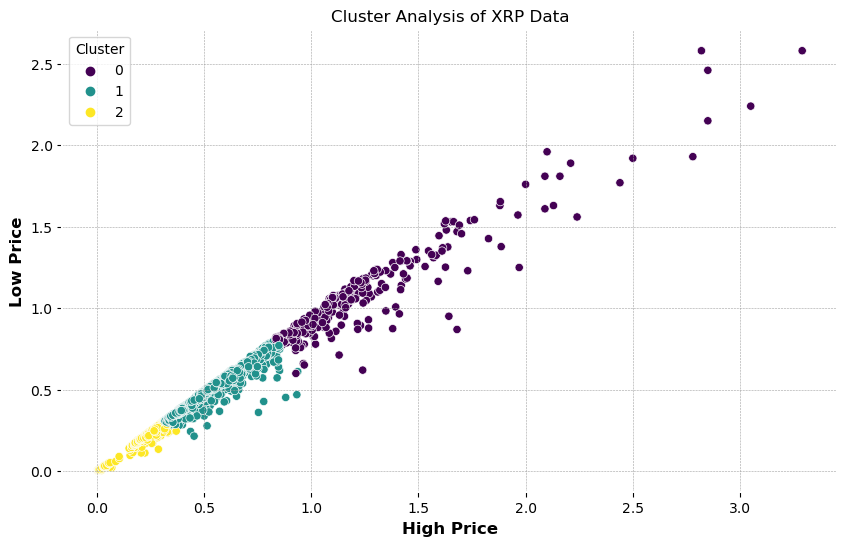

In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns

# Data directory
data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'

# Load XRP data
xrp_file = os.path.join(data_dir, 'XRP.csv')
xrp_data = pd.read_csv(xrp_file, parse_dates=['date'])

# Check required columns and add placeholders for missing ones
required_columns = ['open', 'high', 'low', 'close', 'volume']
for col in required_columns:
    if col not in xrp_data.columns:
        print(f"Warning: Missing column '{col}'. Adding placeholder.")
        xrp_data[col] = 0

# Drop rows with missing data in required columns
xrp_data = xrp_data.dropna(subset=required_columns)

# Select features for clustering
features = xrp_data[required_columns]

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_imputed)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
xrp_data['cluster'] = kmeans.fit_predict(scaled_features)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=xrp_data['high'],
    y=xrp_data['low'],
    hue=xrp_data['cluster'],
    palette='viridis'
)
plt.title('Cluster Analysis of XRP Data')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### BTC vs XRP Daily Returns - Key Differences

| **Aspect**                  | **Bitcoin (BTC)**                           | **XRP**                                   |
|-----------------------------|--------------------------------------------|-------------------------------------------|
| **Mean Daily Return**       | **0.0028** → Slight positive bias          | **0.0026** → Slight positive bias         |
| **Median Daily Return**     | **0.0008**                                 | **0.0006**                                |
| **Volatility (Box Width)**  | **Wider box** → Higher volatility          | **Narrower box** → Lower volatility       |
| **Outliers**                | Significant outliers on both sides         | Outliers exist, but more **positive** ones|
| **Symmetry**                | Slight positive skew (mean > median)       | Relatively symmetric distribution         |
| **Range of Returns**        | **Wider range** → More extreme values      | **Smaller range** → Tighter distribution  |

---

### **Key Takeaways**:
1. **Volatility**: BTC has **higher volatility**; XRP’s returns are more stable.
2. **Outliers**: BTC shows extreme values on both sides, while XRP’s positive outliers dominate.
3. **Positive Bias**: Both BTC and XRP have a small **positive bias**, but BTC’s mean return is slightly higher.
4. **Return Distribution**: BTC’s returns are **more spread out** and skewed, while XRP’s are **tightly clustered**.

---

**Summary**:  
- BTC → **Higher volatility, broader range, and more extreme returns**.  
- XRP → **Lower volatility, symmetric distribution, and occasional large positive gains**.
